# Other procedures to generate XYZ masks

TODO: change

In [1]:
from diffractio import plt, np, mm, degrees, um
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.diffractio import Diffractio
from diffractio.utils_drawing import draw_several_fields

In [2]:
# change to pv.set_jupyter_backend('trame') for dynamic images.
import pyvista as pv
pv.set_jupyter_backend('static')

## Adding masks

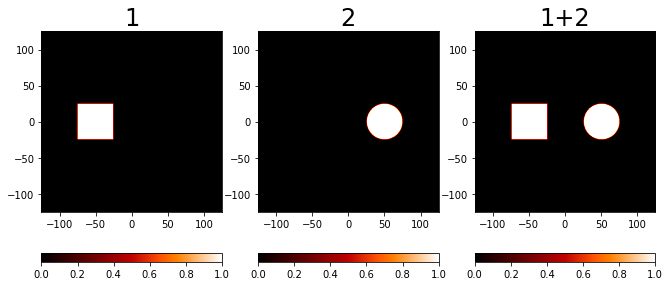

In [3]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.square(r0=(-50 * um, 0 * um), size=(50 * um, 50 * um), angle=0 * degrees)

t2 = Scalar_mask_XY(x, y, wavelength)
t2.circle(r0=(50 * um, 0 * um), radius=(25 * um, 25 * um), angle=0 * degrees)

t3 = t2 + t1

draw_several_fields([t1, t2, t3], titles=["1", "2", "1+2"])

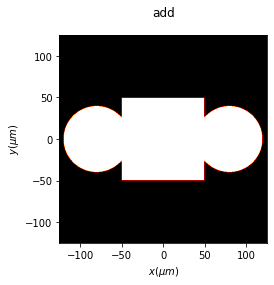

In [4]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.square(r0=(0 * um, 0 * um), size=(100 * um, 100 * um), angle=0 * degrees)

t2 = Scalar_mask_XY(x, y, wavelength)
t2.circle(r0=(80 * um, 0 * um), radius=(40 * um, 40 * um), angle=0 * degrees)

t3 = Scalar_mask_XY(x, y, wavelength)
t3.circle(r0=(-80 * um, 0 * um), radius=(40 * um, 40 * um), angle=0 * degrees)

t4 = t2.add(t1, "mask")
t5 = t4.add(t3, "mask")
t5.draw(title="add")

## Substracting masks

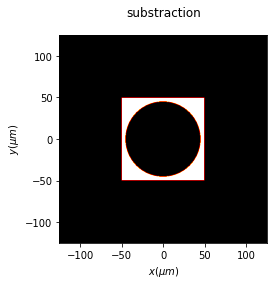

In [5]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.square(r0=(0 * um, 0 * um), size=(100 * um, 100 * um), angle=0 * degrees)

t2 = Scalar_mask_XY(x, y, wavelength)
t2.circle(r0=(0 * um, 0 * um), radius=(45 * um, 45 * um), angle=0 * degrees)

t3 = t2 - t1
t3.draw(title="substraction")

## Extruxion for XY mask

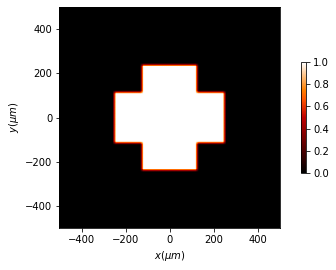

In [6]:
x0 = np.linspace(-500 * um, 500 * um, 64)
y0 = np.linspace(-500 * um, 500 * um, 65)
z0 = np.linspace(0 * um, 1000 * um, 66)
wavelength = 5 * um

params = dict(x = x0, 
              y = y0,
              z = z0,
              wavelength = wavelength,
              n_background = 1.,
              info = '')


txy = Diffractio('scalar', 'mask', x=x0, y=y0, wavelength=wavelength,  info='')
txy.circle(r0=(0,0), radius=200*um)
txy.cross(r0=(0 * um, 0 * um), size=(500 * um, 250 * um), angle=0 * degrees)

txy.draw(has_colorbar='vertical')

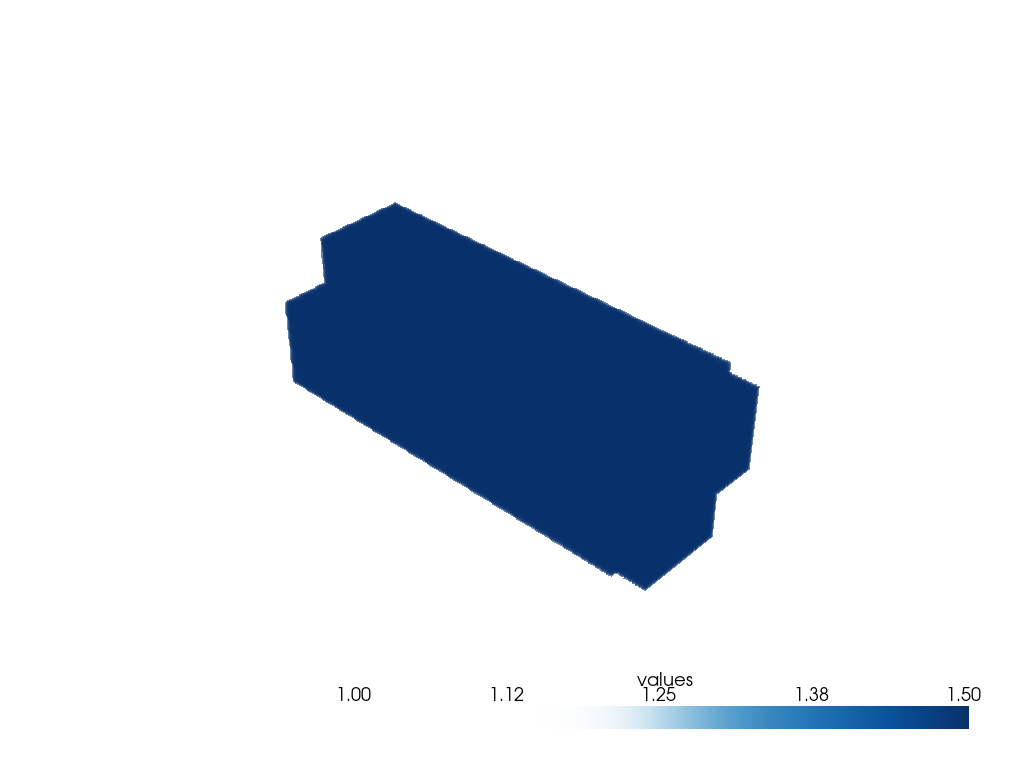

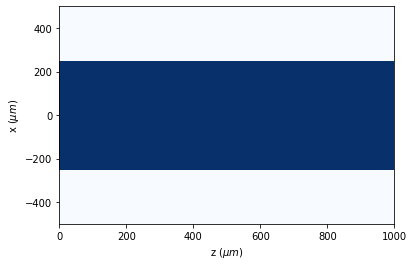

In [7]:
uxyz = Diffractio('scalar', 'mask', **params)

uxyz.extrude_mask_XY(txy=txy, refractive_index=1.5)

uxyz.draw_XYZ('refractive_index', 'volume')

uxz_new = uxyz.to_Scalar_field_XZ(y0=0*um)
uxz_new.draw_refractive_index()

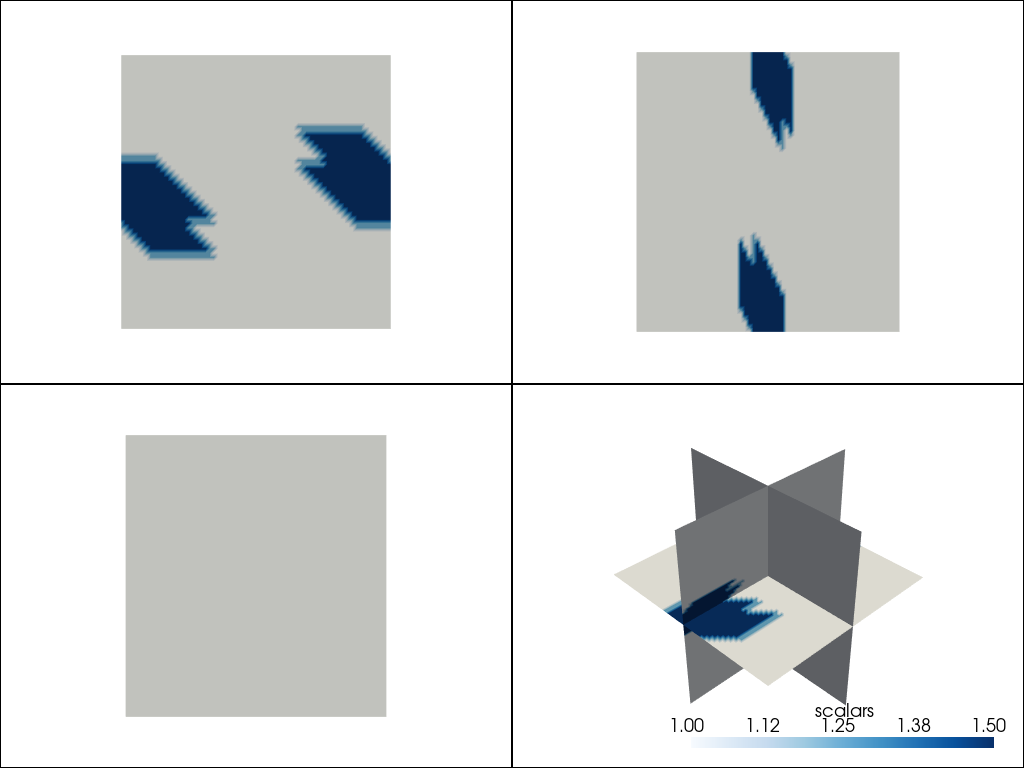

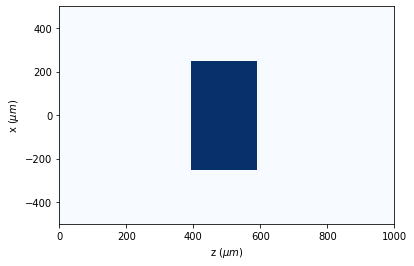

In [8]:
uxyz = Diffractio('scalar', 'mask', **params)

uxyz.extrude_mask_XY(txy=txy, z0=400*um, z1=600*um, refractive_index=1.5)

uxyz.draw_XYZ('refractive_index', 'projections')

uxz_new = uxyz.to_Scalar_field_XZ(y0=0*um)
uxz_new.draw_refractive_index()

## Extruxion for XZ mask

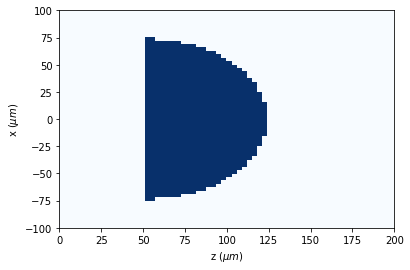

In [9]:
x0 = np.linspace(-100 * um, 100 * um, 64)
y0 = np.linspace(-100 * um, 100 * um, 65)
z0 = np.linspace(0 * um, 200 * um, 66)
wavelength = 0.5 * um

uxz = Diffractio('scalar', 'mask', x=x0, z=z0, wavelength=wavelength, n_background=1)
uxz.semi_cylinder(
    r0=(0 * um, 50 * um), radius=75 * um, refractive_index=2, angle=0 * degrees
)

uxz.draw_refractive_index()

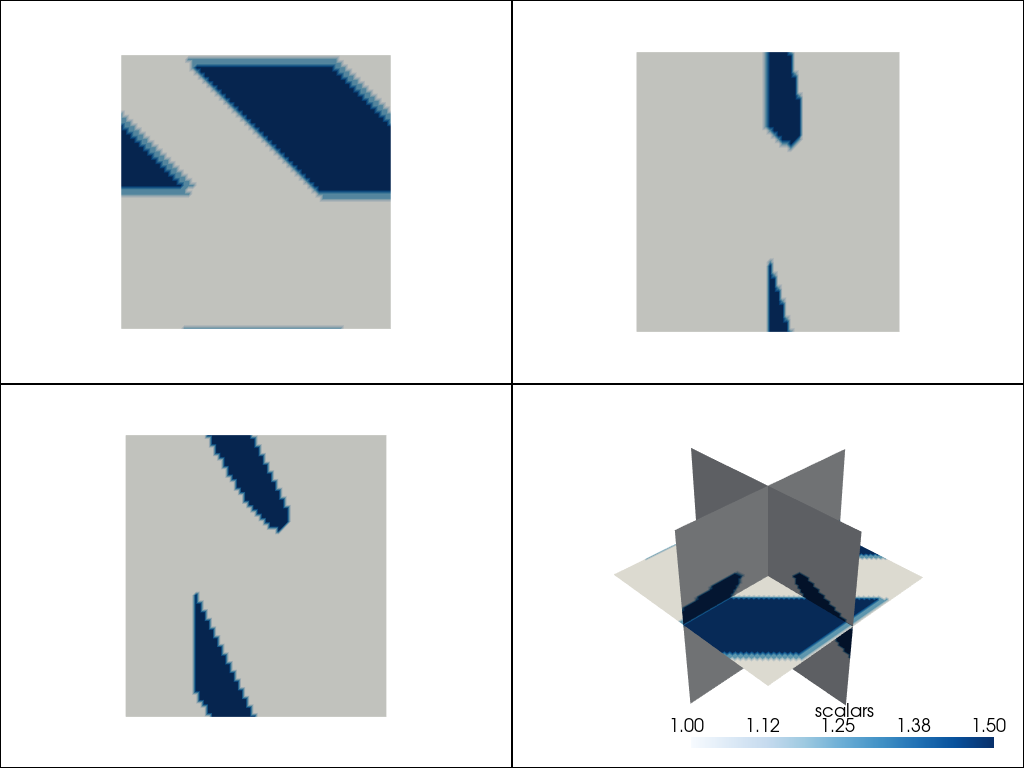

In [10]:
uxyz = Diffractio('scalar', 'mask', x=x0, y=y0, z=z0, wavelength=wavelength, n_background=1)
    
uxyz.extrude_mask_XZ(txz=uxz, y0=0*um, y1=100*um, refractive_index=1.5, n_new = None)

uxyz.draw_XYZ(kind= "refractive_index", drawing= "projections")

## Extrude radial from XZ

## Rotation

## Mask from surface functions

0
1
2


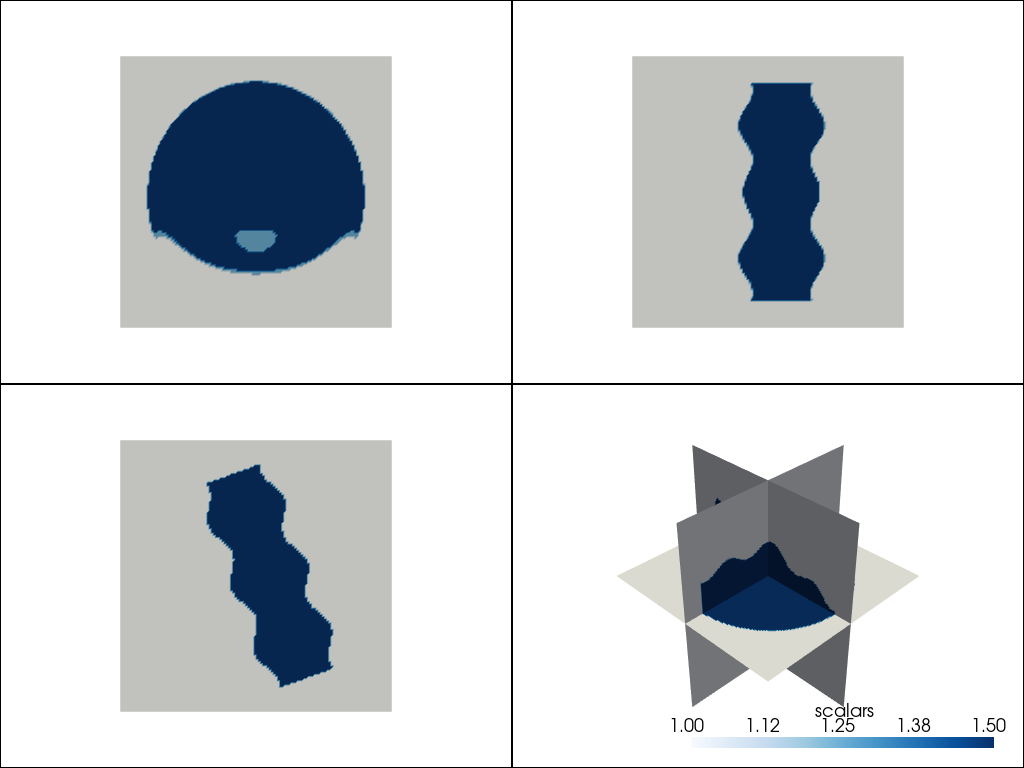

In [12]:
x0 = np.linspace(-100*um, 100*um, 128)
y0 = np.linspace(-100*um, 100*um, 128)
z0 = np.linspace(-100*um, 100*um, 128)
wavelength = 0.6238*um
radius = 80*um

f1 = 'Zrot>-25*um-5*np.cos(2*np.pi*np.sqrt(Xrot**2+Yrot**2)/50)'
f2 = 'Zrot<25*um+5*np.cos(2*np.pi*np.sqrt(Xrot**2+Yrot**2)/50)'
f3 = 'np.sqrt(Xrot**2+Yrot**2<{}**2)'.format(radius)

fs = [f1,f2,f3]
rotation1 = dict(kind = 'axis', point=(0,0,10), axis=(1,0,0), angle=20*degrees)
rotation2 = dict(kind = 'point', point=(0.,0.,0.), angle=(45*degrees, 45*degrees, 45*degrees))

v_globals = {'um': 1, 'np': np}

t1 = Diffractio('scalar', 'mask', x=x0, y=y0,z=z0, wavelength=wavelength)
ipasa = t1.mask_from_function(
                            r0=(0*um, 0*um),
                            refractive_index=1.5,
                            fs=fs,
                            rotation=rotation1,
                            v_globals=v_globals)


t1.draw_XYZ(kind= "refractive_index", drawing= "projections", opacity='sigmoid', filename='')

## Object by surfaces
TODO

## Insert_array_masks
The mask is repited in x-y axis separated a certain distance

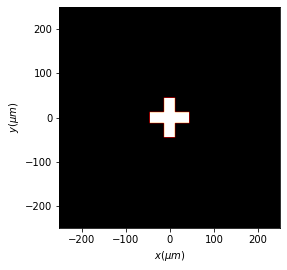

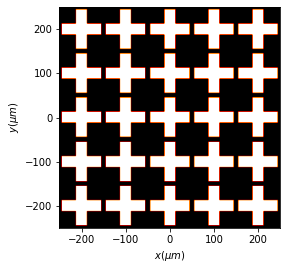

In [10]:
x = np.linspace(-250 * um, 250 * um, 512)
y = np.linspace(-250 * um, 250 * um, 512)
wavelength = 1 * um

s = Scalar_mask_XY(x, y, wavelength)
s.cross(r0=(0 * um, 0 * um), size=(90 * um, 25 * um), angle=0 * degrees)
s.draw()

t1 = Scalar_mask_XY(x, y, wavelength)
num_points = t1.insert_array_masks(
    t1=s, space=[100 * um, 100 * um], margin=50 * um, angle=90 * degrees
)
t1.draw(kind="intensity")

In [11]:
print(s)

Scalar_mask_XY
 - x:  (512,),   y:  (512,),   u:  (512, 512)
 - xmin:       -250.00 um,  xmax:      250.00 um,  Dx:   0.98 um
 - ymin:       -250.00 um,  ymax:      250.00 um,  Dy:   0.98 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  0.00 deg, phase_max: 0.00 deg
 - wavelength: 1.00 um
 - date:       2024-11-08_15_50_28



In [12]:
print(t1)

Scalar_mask_XY
 - x:  (512,),   y:  (512,),   u:  (512, 512)
 - xmin:       -250.00 um,  xmax:      250.00 um,  Dx:   0.98 um
 - ymin:       -250.00 um,  ymax:      250.00 um,  Dy:   0.98 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  0.00 deg, phase_max: 180.00 deg
 - wavelength: 1.00 um
 - date:       2024-11-08_15_50_28



## repeat_structure

The mask si repeated (n,m) times. The size of the new mask is (n,m) times greater.

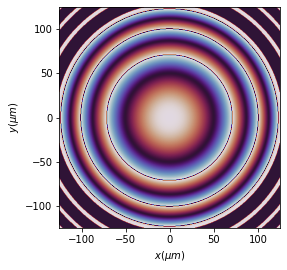

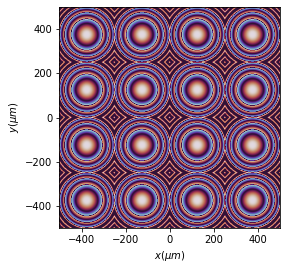

In [13]:
size = 250 * um
x0 = np.linspace(-size / 2, size / 2, 512)
y0 = np.linspace(-size / 2, size / 2, 512)

wavelength = 0.6328 * um

focal = 4 * mm
lenslet = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
lenslet.lens(r0=(0 * um, 0 * um), radius=size / 2, focal=focal)
lenslet.draw("phase")

lens_array = lenslet.repeat_structure(
    num_repetitions=(4, 4), position="center", new_field=True
)
lens_array.draw("phase")

In [14]:
print(lenslet)

Scalar_mask_XY
 - x:  (512,),   y:  (512,),   u:  (512, 512)
 - xmin:       -125.00 um,  xmax:      125.00 um,  Dx:   0.49 um
 - ymin:       -125.00 um,  ymax:      125.00 um,  Dy:   0.49 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  -179.93 deg, phase_max: 180.00 deg
 - wavelength: 0.63 um
 - date:       2024-11-08_15_50_29



In [15]:
print(lens_array)

Scalar_mask_XY
 - x:  (2048,),   y:  (2048,),   u:  (2048, 2048)
 - xmin:       -500.00 um,  xmax:      500.00 um,  Dx:   0.49 um
 - ymin:       -500.00 um,  ymax:      500.00 um,  Dy:   0.49 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  -179.93 deg, phase_max: 180.00 deg
 - wavelength: 0.63 um
 - date:       2024-11-08_15_50_30

